# Library

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gathering Data

In [5]:
layer1 = pd.read_excel('hole6-layer1.xlsx')

In [6]:
layer2 = pd.read_excel('hole6-layer2.xlsx')

In [7]:
layer3 = pd.read_excel('hole6-layer3.xlsx')

In [35]:
layer3

,X,Y,Z,layer
0,-0.121870,-0.114547,-0.614062,Layer3
1,-0.089438,-0.102331,-0.594217,Layer3
2,-0.057786,-0.094630,-0.593084,Layer3
3,-0.031758,-0.093129,-0.596824,Layer3
4,-0.025732,-0.084928,-0.599553,Layer3
...,...,...,...,...
49995,-0.166121,-0.236463,-0.656018,Layer3
49996,-0.164059,-0.218963,-0.660147,Layer3
49997,-0.142092,-0.183254,-0.683355,Layer3
49998,-0.092292,-0.138173,-0.704150,Layer3


# Cleaning Data

**Missing Value**

In [8]:
def check_nan_null(dataframe):
  if dataframe.isnull().values.any() == True:
      print("DataFrame contains NaN or null values.")
  else:
      print("DataFrame does not contain any NaN or null values.")

In [9]:
check_nan_null(layer1)
check_nan_null(layer2)
check_nan_null(layer3)

DataFrame does not contain any NaN or null values.
DataFrame does not contain any NaN or null values.
DataFrame does not contain any NaN or null values.


**Add new columns**

In [10]:
layer1['layer'] = "Layer1"
layer2['layer'] = "Layer2"
layer3['layer'] = "Layer3"

layer1

,X,Y,Z,layer
0,-4.092122,-0.604519,0.231390,Layer1
1,1.238322,-0.818233,1.499981,Layer1
2,-2.619706,2.349278,-1.789471,Layer1
3,5.634630,-0.294944,6.465341,Layer1
4,-1.917923,-0.900646,-0.942375,Layer1
...,...,...,...,...
49995,-0.561061,-1.519601,3.368515,Layer1
49996,0.424254,-0.044728,1.610597,Layer1
49997,-0.640672,-0.887954,0.131873,Layer1
49998,-0.053822,-0.752650,0.600952,Layer1


**Merge all dataframes**

In [11]:
df = pd.concat([layer1, layer2, layer3], ignore_index=True)
df

,X,Y,Z,layer
0,-4.092122,-0.604519,0.231390,Layer1
1,1.238322,-0.818233,1.499981,Layer1
2,-2.619706,2.349278,-1.789471,Layer1
3,5.634630,-0.294944,6.465341,Layer1
4,-1.917923,-0.900646,-0.942375,Layer1
...,...,...,...,...
149995,-0.166121,-0.236463,-0.656018,Layer3
149996,-0.164059,-0.218963,-0.660147,Layer3
149997,-0.142092,-0.183254,-0.683355,Layer3
149998,-0.092292,-0.138173,-0.704150,Layer3


# Feature Engineering

## Time-domain Feature Extraction

In [12]:
dimension = df.iloc[:, 0:3].values

In [13]:
from scipy.stats import kurtosis

extracted_features = np.zeros((len(df), 1))

for x in range(len(extracted_features)):
  extracted_features[x] = kurtosis(dimension[x])

In [14]:
extracted_features = pd.DataFrame(extracted_features)
extracted_features = extracted_features.rename(columns = {0:'kurt'})
extracted_features

,kurt
0,-1.5
1,-1.5
2,-1.5
3,-1.5
4,-1.5
...,...
149995,-1.5
149996,-1.5
149997,-1.5
149998,-1.5


In [15]:
# array 'dimension' dikembalikan ke bentuk dataframe
dimension = pd.DataFrame(dimension)
dimension = dimension.rename(columns = {0:'x', 1:'y', 2:'z'})

In [16]:
extracted_features['mean'] = dimension.mean(axis=1)
extracted_features['rms'] = np.sqrt(np.mean(dimension ** 2, axis=1))
extracted_features['std'] = dimension.std(axis=1)
extracted_features['var'] = dimension.var(axis=1)
extracted_features['skew'] = dimension.skew(axis=1)
extracted_features['crest_factor'] = dimension.max(axis=1) / extracted_features['rms']
extracted_features['shape_factor'] = extracted_features['rms'] / extracted_features['mean']

In [17]:
extracted_features

,kurt,mean,rms,std,var,skew,crest_factor,shape_factor
0,-1.5,-1.488417,2.391962,2.293283,5.259146,-1.476772,0.096736,-1.607051
1,-1.5,0.640023,1.218317,1.269646,1.612000,-1.649658,1.231191,1.903551
2,-1.5,-0.686633,2.279194,2.661746,7.084889,1.544408,1.030750,-3.319377
3,-1.5,3.935009,4.954348,3.686719,13.591897,-1.633644,1.304983,1.259044
4,-1.5,-1.253648,1.338863,0.575657,0.331381,-1.721817,-0.672695,-1.067974
...,...,...,...,...,...,...,...,...
149995,-1.5,-0.352867,0.413872,0.264882,0.070162,-1.595648,-0.401382,-1.172883
149996,-1.5,-0.347723,0.412575,0.271956,0.073960,-1.652970,-0.397647,-1.186505
149997,-1.5,-0.336234,0.416632,0.301320,0.090793,-1.695759,-0.341049,-1.239114
149998,-1.5,-0.311538,0.417707,0.340785,0.116134,-1.696798,-0.220949,-1.340788


# Frequency-domain Feature Extraction

In [18]:
def frequency_centre(signal):
    return ((signal.diff()*signal).sum()) / (2 * np.pi * np.sum(signal**2))

def mean_square_frequency(signal):
    return  np.sum(signal.diff()**2) / (4 * np.pi**2 * np.sum(signal**2))

def root_mean_square_frequency(signal):
    return  np.sqrt(mean_square_frequency(signal))

def root_variance_frequency(signal):
    return  np.sqrt(mean_square_frequency(signal) - frequency_centre(signal)**2)

# calculate FC, RMSF, and RVF
extracted_features['fc'] = dimension.apply(lambda row: frequency_centre(row[['x', 'y', 'z']]), axis=1)
extracted_features['rmsf'] = dimension.apply(lambda row: root_mean_square_frequency(row[['x', 'y', 'z']]), axis=1)
extracted_features['rvf'] = dimension.apply(lambda row: root_variance_frequency(row[['x', 'y', 'z']]), axis=1)

extracted_features

,kurt,mean,rms,std,var,skew,crest_factor,shape_factor,fc,rmsf,rvf
0,-1.5,-1.488417,2.391962,2.293283,5.259146,-1.476772,0.096736,-1.607051,-0.017756,0.137772,0.136623
1,-1.5,0.640023,1.218317,1.269646,1.612000,-1.649658,1.231191,1.903551,0.184429,0.233730,0.143582
2,-1.5,-0.686633,2.279194,2.661746,7.084889,1.544408,1.030750,-3.319377,0.194853,0.260718,0.173222
3,-1.5,3.935009,4.954348,3.686719,13.591897,-1.633644,1.304983,1.259044,0.098247,0.166780,0.134770
4,-1.5,-1.253648,1.338863,0.575657,0.331381,-1.721817,-0.672695,-1.067974,-0.025952,0.069876,0.064878
...,...,...,...,...,...,...,...,...,...,...,...
149995,-1.5,-0.352867,0.413872,0.264882,0.070162,-1.595648,-0.401382,-1.172883,0.090397,0.094450,0.027371
149996,-1.5,-0.347723,0.412575,0.271956,0.073960,-1.652970,-0.397647,-1.186505,0.094519,0.099018,0.029507
149997,-1.5,-0.336234,0.416632,0.301320,0.090793,-1.695759,-0.341049,-1.239114,0.106753,0.110670,0.029184
149998,-1.5,-0.311538,0.417707,0.340785,0.116134,-1.696798,-0.220949,-1.340788,0.123104,0.124913,0.021181


# Train-Test-Split

In [19]:
from sklearn.model_selection import train_test_split

X = extracted_features
y = df.iloc[:, [3]].values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 137)

# Hyperparameter Tuning

## RandomizedSearchCV

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
#import scipy as sp

cross_val_score(RandomForestClassifier(), X_train, y_train.ravel(), cv=5, scoring='accuracy').mean()

1.0

In [25]:
params = {
    'n_estimators': [100, 300, 500, 750, 800, 1200],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10]
}

In [28]:
rs = RandomizedSearchCV(RandomForestClassifier(), 
                        params, n_iter=5, 
                        cv=5, scoring='accuracy',
                        random_state=42)
rs.fit(X_train, y_train.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [2, 4, 6, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 300, 500, 750,
                                                         800, 1200]},
                   random_state=42, scoring='accuracy')

In [29]:
rs.best_score_

1.0

In [30]:
rs.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 8,
 'max_depth': 5}

# Model Development

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier(n_estimators=100, min_samples_split=6, min_samples_leaf=8, max_depth=5)
model = RF.fit(X_train, y_train.ravel())
y_pred = model.predict(X_test)

print("Training accuracy: ", model.score(X_train, y_train.ravel()))
print("Testing accuracy: ", accuracy_score(y_pred, y_test))

Training accuracy:  1.0
Testing accuracy:  1.0


## Confusion Matrix

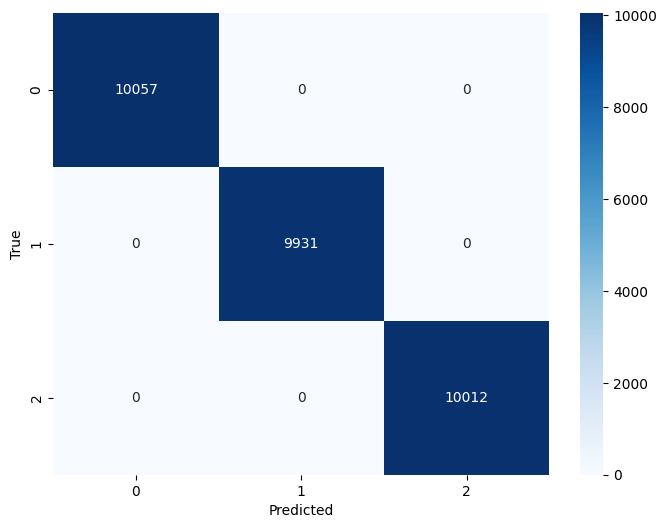

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()